# Creando la primera red convolucional


In [42]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import os
import sys

sys.path.append(os.path.dirname(os.path.abspath(os.path.abspath(""))))

In [44]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"


import matplotlib.pyplot as plt
import numpy as np
from keras import Sequential
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPool2D
from keras.losses import SparseCategoricalCrossentropy
from keras.utils import to_categorical

Nuestro trabajo de esta sección consiste en resolver un problema de clasificación multiple. Poder clasificar entre 10 tipos de prenda de vestir. Para ello vamos a utilizar el dataset [Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/)

El cual cuenta con 60,000 imágenes de 28x28 píxeles en escala de grises. Adicionalmente, cuenta con un set de prueba de 10,000 imágenes con las mismas características que el set de entrenamiento.

Las clases disponibles son:

| Label |   Description   |
| :---: | :-------------: |
|   0   | **T-shirt/top** |
|   1   |   **Trouser**   |
|   2   |  **Pullover**   |
|   3   |    **Dress**    |
|   4   |    **Coat**     |
|   5   |   **Sandal**    |
|   6   |    **Shirt**    |
|   7   |   **Sneaker**   |
|   8   |     **Bag**     |
|   9   | **Ankle boot**  |


In [45]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [46]:
# 60_000 imagenes de 28x28 pixeles
print(
    f"{train_images.shape[0]} imagenes de {train_images.shape[1]}x{train_images.shape[2]} pixeles"
)
# train_images.shape

60000 imagenes de 28x28 pixeles


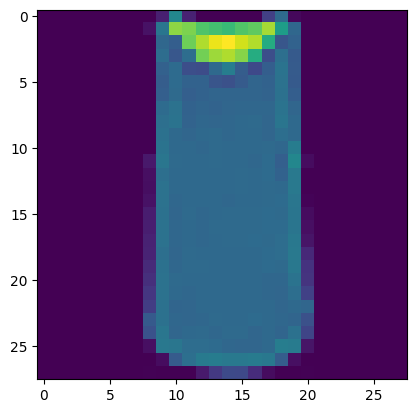

In [47]:
plt.imshow(train_images[2])
plt.show()

Normalizando datos


In [48]:
# Normalizando datos
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

A diferencia de las redes neuronales normales, dónde la entrada debía ser un vector de 1 dim
en las CNN la entrada es una matriz, es por eso que en el reshape debemos tomar en cuenta
[[]].reshape(n, x, y, c)

n, x, y, c ->
n = número de imágenes,
x = ancho de la imagen,
y = largo de la imagen,
c = número de canales.

Dado que nuestras imágenes están en escala de grises, entonces el número de canales que maneja es 1.


In [49]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

Transformando números del 0 al 9 (10 clases) en su One Hot Encoding


In [50]:
train_labels_categorical = to_categorical(train_labels, 10)
test_labels_categorical = to_categorical(test_labels, 10)

**NOTA:** Cabe destacar que por ser una CNN NO fue necesario usar un vector 1d para esta arquitectura.


Definimos la arquictecura


In [51]:
def architecture(model_: Sequential):
    model_.add(
        Conv2D(
            filters=64,
            kernel_size=2,
            padding="same",
            activation="relu",
            input_shape=(28, 28, 1),
        )
    )
    model_.add(MaxPool2D(pool_size=2))
    # Reduce el overfitting
    model_.add(Dropout(0.30))
    # Apilar capas
    model_.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
    model_.add(MaxPool2D(pool_size=2))
    model_.add(Dropout(0.30))
    # Esta capa sirve para aplanar y pasar de redes convolucionales a normales
    model_.add(Flatten())
    model_.add(Dense(256, activation="relu"))
    model_.add(Dropout(0.5))
    # Como es un problema de clasificación multilabel usamos softmax como activacion de la lutima capa
    model_.add(Dense(10, activation="softmax"))
    print(model_.summary())
    # Compilacion del modelo con la informacio
    model_.compile(
        loss="categorical_crossentropy", optimizer="rmsprop", metrics="accuracy"
    )
    return model_

## Entrenando nuestra primera red convolucional


In [52]:
def plot_results(history_, metric):
    history_dict = history_.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    metric_values = history_dict[metric]
    val_metric_values = history_dict[f"val_{metric}"]
    epoch = range(1, len(loss_values) + 1)
    fig, ax = plt.subplots(1, 2, figsize=(8, 5))
    fig.suptitle("Neural Network's Result")
    ax[0].set_title("Loss function over epochs")
    ax[1].set_title(f"{metric} over epoch")
    ax[0].set(ylabel="loss", xlabel="epoch")
    ax[1].set(ylabel=metric, xlabel="epoch")

    ax[0].plot(epoch, loss_values, "o-r", label="training")
    ax[0].plot(epoch, val_loss_values, "--", label="validation")
    ax[1].plot(epoch, metric_values, "o-r", label="training")
    ax[1].plot(epoch, val_metric_values, "--", label="validation")
    ax[0].legend()
    ax[1].legend()
    plt.show()

## Entrenando el modelo


In [53]:
model = Sequential()
model = architecture(model)
history = model.fit(
    train_images,
    train_labels_categorical,
    batch_size=64,
    epochs=10,
    validation_split=0.3,
)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 7, 7, 32)         

## Análisis de resultados


In [54]:
score = model.evaluate(test_images, test_labels_categorical)
print(score)

313/313 [==============================] - 1s 2ms/step - loss: 0.2962 - accuracy: 0.8924
[0.29621776938438416, 0.8924000263214111]


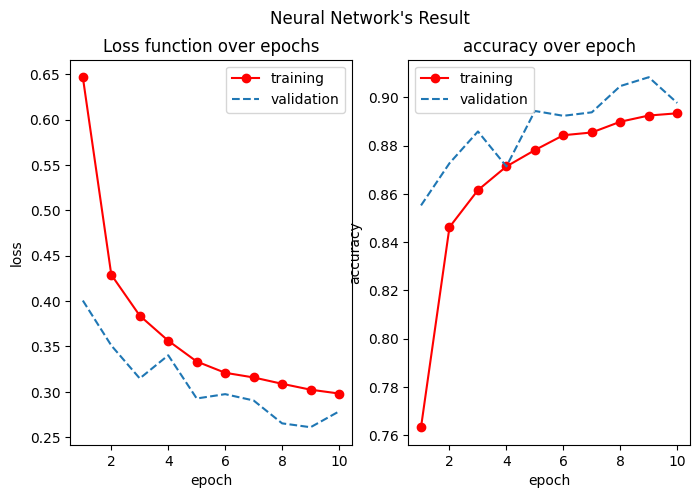

In [55]:
plot_results(history, "accuracy")

## BONUS: Una forma alternativa de resolución del problema.

Para esta forma alternativa, vamos a modificar la arquitectura del modelo levemente, en esta ocasión vamos a utilizar como función de perdida SparseCategoricalCrossentropy está nos va a permitir trabajar directamente con los valores originales de los labels, train_labels, test_labels sin necesidad de pasarlos por la función to_categorical adicionalmente, nos permitirá NO usar la función softmax que hemos utilizado siempre en problemas de clasificación multiple.


Nueva arquitectura:


In [56]:
def architecture_sparse(model_: Sequential):

    model_.add(
        Conv2D(
            filters=64,
            kernel_size=2,
            padding="same",
            activation="relu",
            input_shape=(28, 28, 1),
        )
    )
    model_.add(MaxPool2D(pool_size=2))
    model_.add(Dropout(0.3))
    model_.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
    model_.add(MaxPool2D(pool_size=2))
    model_.add(Dropout(0.3))
    model_.add(Flatten())
    model_.add(Dense(256, activation="relu"))
    model_.add(Dropout(0.5))
    # Utilizando como perdida la SparceCategoricalCrossentropy
    model_.add(Dense(10))
    print(model_.summary())
    model_.compile(
        loss=SparseCategoricalCrossentropy(from_logits=True),
        optimizer="rmsprop",
        metrics="accuracy",
    )
    return model_

Entrenamos nuestro nuevo modelo:


In [57]:
model_sparse = Sequential()
model_sparse = architecture_sparse(model_sparse)
# Este tipo de modelo NO exige usar las encadenadas de capas como categoricas, por eso puedo usar las train_labels normal.
history = model_sparse.fit(
    train_images, train_labels, batch_size=64, epochs=10, validation_split=0.3
)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 7, 7, 32)         

In [58]:
score_sparse = model_sparse.evaluate(test_images, test_labels)
print(score_sparse)

313/313 [==============================] - 1s 2ms/step - loss: 0.2659 - accuracy: 0.9024
[0.26593655347824097, 0.902400016784668]


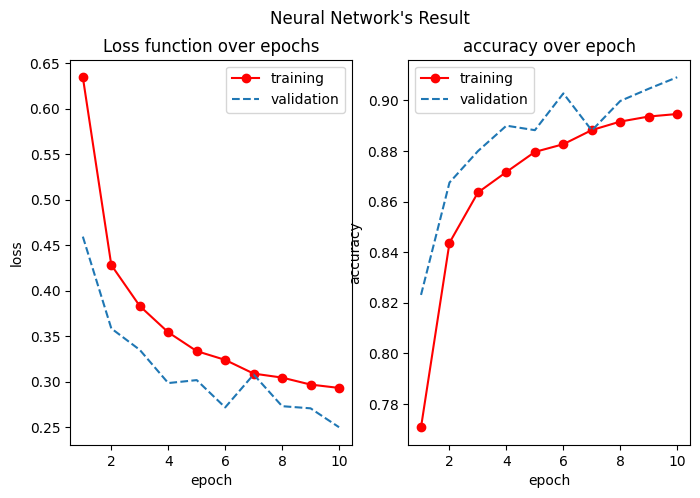

In [59]:
plot_results(history, "accuracy")